In [4]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [26]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

###
# Name: Enea DOdi
# Student ID: 2296306
# Email: dodi@chapman.edu
# Course: PHYS220/MATH220/CPSC220 Fall 2018
# Assignment: c209
###

def gradient(x):
        """gradient function
        Args: x - input numpy array consiting of a set of n domain points.
        Returns: a n by n matrix creating a finite difference linear operator"""
        dx = x[1]-x[0] #dx should be a very small number
        ones = np.ones(x.size-1) #an array contiang just ones, which will be the values placed in the gradient
        diag1 = np.diag(-1*ones,-1) #The negative one which will represent (fi - 1)
        diag2 = np.diag(ones,1)#Postive integer one which will represent (fi - 1)
        gradient = diag1+diag2
        
        #The parts of the gradient where central difference cannot be used
        gradient[0][0] = -2 
        gradient[0][1] = 2
        gradient[-1][-2] = -2
        gradient[-1][-1] = 2
        
        return np.divide(gradient,2*dx)

def deriv(x,f):
    """deriv function
    Args: x - input numpy array consisting of a set of n domain points
          f - function which the derivative will be calculated from
          Returns: DerivY - the y values of the derivative"""
    func = np.vectorize(f)
    yVals = func(x) #Get y values of the domain points after function f is applied to them
    #derivative creation!
    D = gradient(x)
    DerivY = D@yVals
    #Return the y values of the derivative.
    return DerivY

def deriv_vs_normal_plot(x,f,name):
        """deriv_vs_normal_plot(x,f)
        Args: x - input numpy array consisting of a set of n domain points
        f - function which the derivtive will be calculated from
        Returns: nothing but returns 3 graphs, one which is simply the function f(x), 
        the other is simply the derivative f'(x), and the third is a graph with both the 
        plotting of the functino f(x) and f'(x)"""
        Df = deriv(x,f)
        titl = name+"(x)"
        titl_deriv = name + "'(x)"
        func = np.vectorize(f)
        yVal = func(x)
        s = plt.figure(figsize=(8,6))
        a = plt.axes()
        a.plot(x,yVal, color = "blue")
        a.set(xlabel= "X values", ylabel= "Y values", title=titl)
        plt.show()
        s = plt.figure(figsize=(8,6))
        a = plt.axes()
        a.plot(x,Df, color = "red")
        a.set(xlabel= "X values", ylabel= "Y values", title=titl_deriv)
        plt.show()
        s = plt.figure(figsize=(8,6))
        a = plt.axes()
        a.plot(x,yVal, color = "blue")
        a.plot(x,Df,color = "red")
        a.set(xlabel= "X values", ylabel= "Y values", title=titl + " vs " +titl_deriv)
        plt.show()
        

In [0]:
l = np.array(np.linspace(0,10,100))
deriv_vs_normal_plot(l,np.square,"f")

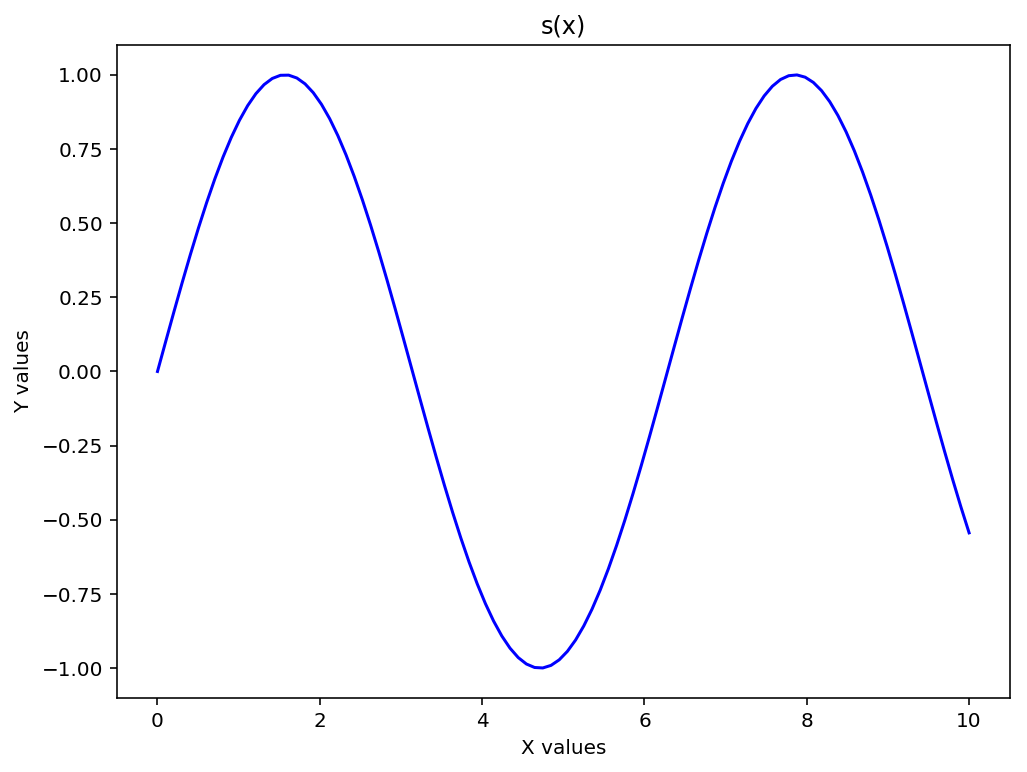

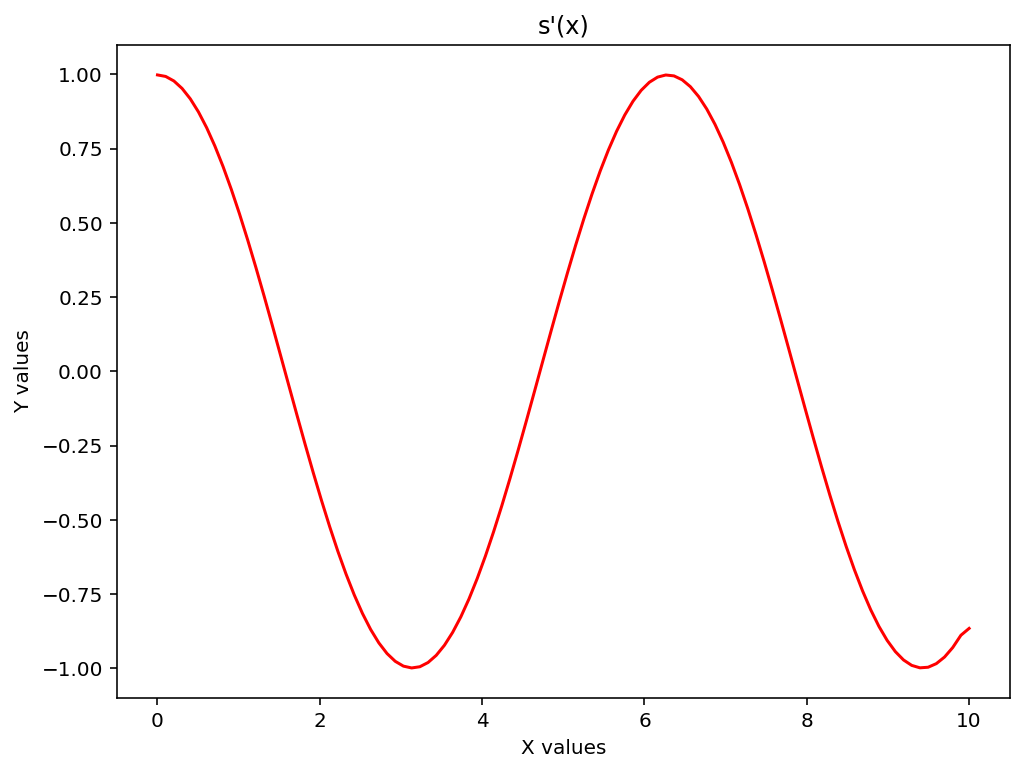

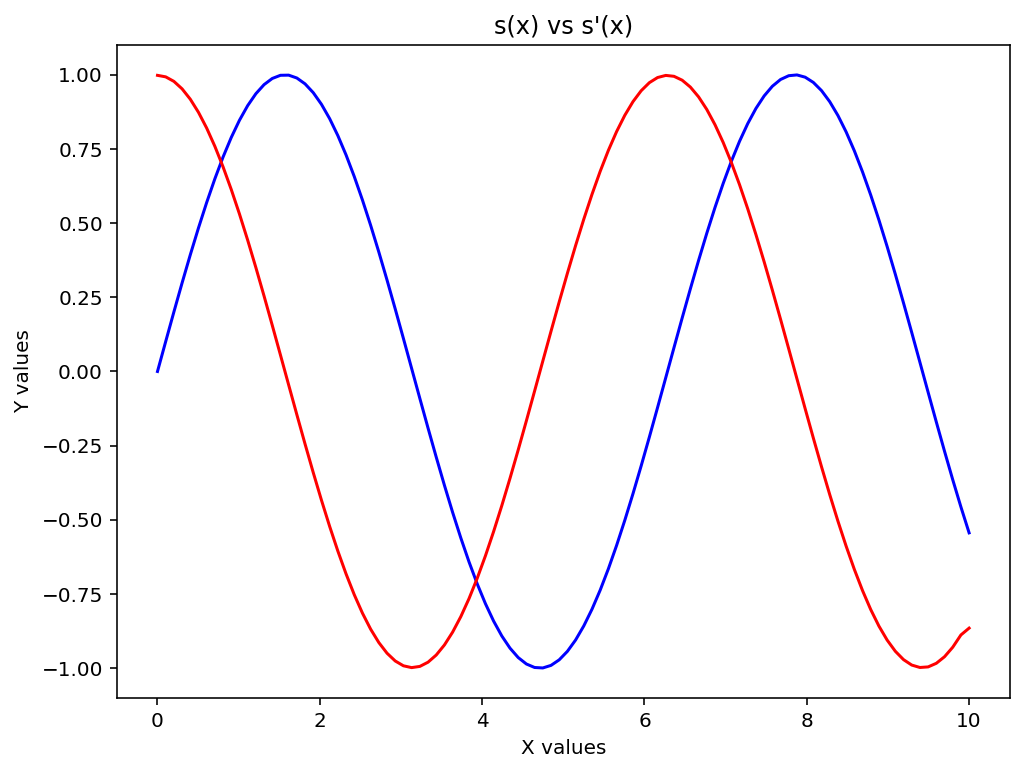

In [32]:
deriv_vs_normal_plot(l,np.sin,"s")

In [33]:
def g(x):
    return np.divide(np.exp(np.divide(np.multiply(np.square(x),-1),2)),np.sqrt(2*np.pi))

NameError: name 'deriv_vs_normal_plot' is not defined

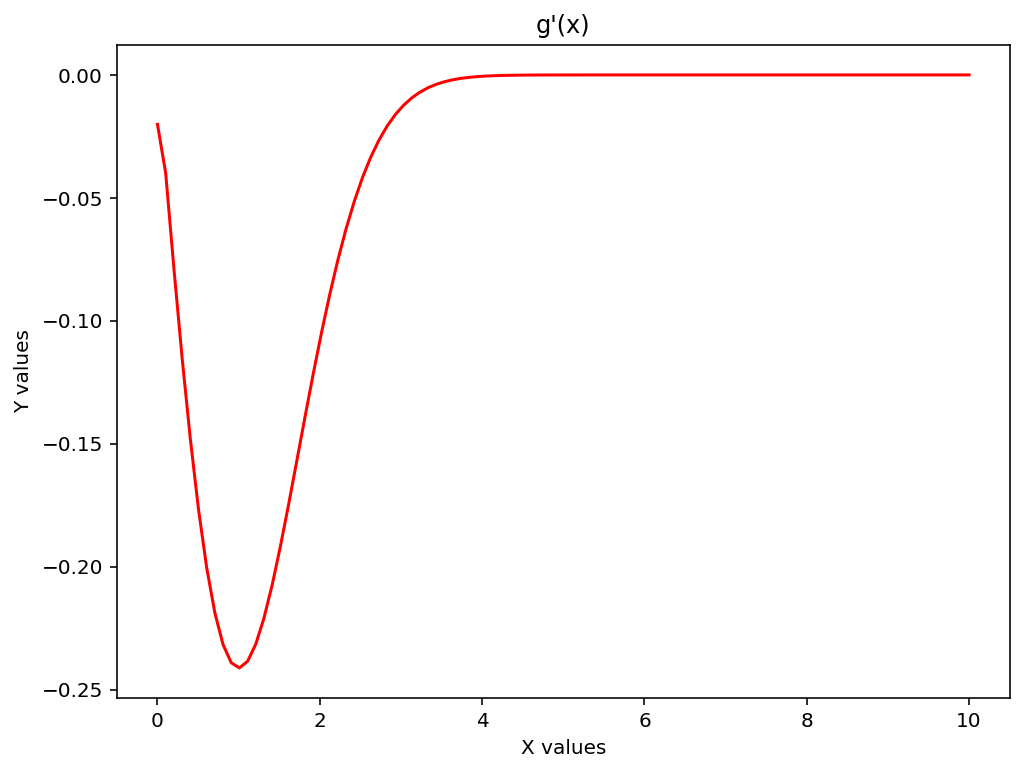

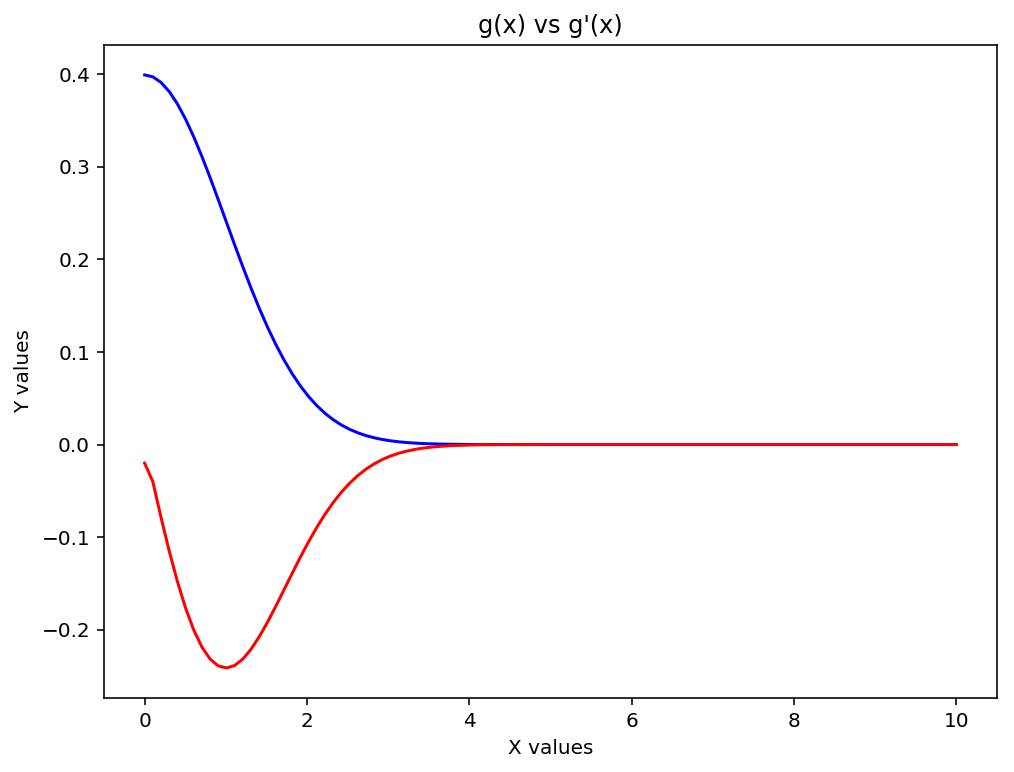

In [3]:
deriv_vs_normal_plot(l,g,"g")

1. In a Jupyter notebook, ```calculus.ipynb```, describe the problem, describe what the form of the derivative matrix should look like using $\LaTeX$ code, then demonstrate your solution by plotting the following test functions and their derivatives: $f(x) = x^2$, $s(x) = \sin(x)$, and $g(x) = \exp(-x^2/2)/\sqrt{2\pi}$. For each function, make a separate plot of the function and its derivative together, with an appropriate legend labeling the curves. Title each plot in an informative way, and choose domains and ranges of each plot that sensibly show your results. (You should write your plotting code in the ```array_calculus.py``` module to be tidy, then import that module and run the appropriate functions in the notebook to generate the desired plots.) Explain whether the results match your intuition, and how changing the number of points $n$ affects your solutions.

[![Build Status](https://travis-ci.com/chapman-phys220-2018f/CHANGEME.svg?branch=master)](https://travis-ci.com/chapman-phys220-2018f/CHANGEME)

# PHYS220/MATH220/CPSC220 CW 9

**Author(s):** **CHANGEME**

## Specification

Recall the [Numpy/Pandas Slides](http://slides.com/profdressel/numpy-and-pandas-overview/) that introduce the `numpy` and `pandas` libraries and how to use them. Note that I have also placed a number of "cheat sheets" in this repository for reference in case they are useful. I recommend saving them to a place you can find them later (or printing them out).

In this assignment, we will start going deeper into the tools we have already learned. Let us practice thinking in arrays more directly by understanding the derivative of a function in a different way than what you are used to.

Recall that the derivative of a function $f$ at a point $x$ is defined as the limit: $$f'(x) = \frac{df}{dx}(x) = Df(x) \equiv \lim_{h \to 0} \frac{f(x+h) - f(x)}{(x + h) - x} = \lim_{h\to 0} \frac{f(x) - f(x - h)}{x - (x - h)} = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{(x+h)-(x-h)}$$

Note that I have written the notation for a derivative above in three different ways. The prime notation $f'(x)$ is based on Newton's original overdot notation and is most compact; the fraction notation $df/dx$ was later preferred by Leibniz to recall the definition as the limit of a fraction; the modern operator notation $Df$ more clearly indicates that $D$ is a differential operator (known as the "gradient") that is acting on the function $f$ and then evaluated at the point $x$. We will be understanding the meaning of $D$ more directly by expressing it as a matrix. 

Also note that I have written the limit definition in three different ways above. The first compares a later point $(x+h)$ to the current point $x$, so is called a "forward difference." The second compares the current point $x$ to a previous point $(x-h)$ so is called a "backward difference." The third compares a later point $(x+h)$ to a previous point $(x-h)$ so is called a "central difference." In the limit that $h\to 0$ the three definitions coincide. However, on a computer we are unable to take this limit in order to compute approximations to a derivative. As a result, the definition we use becomes very important. When we approximate derivatives using small-but-noninfinitesimal $h$, we call the approximation a "finite difference."

It turns out that the central difference is far more accurate than either the forward or backward difference, so should be used whenever enough information is available. To see why this is so, recall the definition of a Taylor expansion of a function nearby a point $x$: $f(x+h) = f(x) + f'(x)h + f''(x)h^2/2 + \cdots + f^{(n)}(x)h^n/n! + \cdots$. Applying this to a forward difference yields: $$\frac{f(x+h) - f(x)}{h} = f'(x) + f''(x)h/2 + \cdots$$
Thus the lowest-order error of the forward difference compared to the exact derivative is first-order in $h$. The backward difference is similarly accurate to first order in $h$. In contrast, the central difference yields:
$$\frac{f(x+h) - f(x-h)}{2h} = f'(x) + f'''(x)h^2/3! + \cdots$$
The lowest-order error is second-order in $h$, since the first-order error cancels! Since $h^2 < h$ for $h<1$, this means that the central difference is much more accurate for small $h$ used in numerical approximations.

1. In a python module ```array_calculus.py``` create a central finite difference linear operator represented by a 2-dimensional matrix. That is, define a function ```gradient(x)``` that takes an input numpy array `x` consisting of a set of $n$ domain points (e.g., defined with a `linspace`), and returns a single two-dimensional numpy array $D$ of dimension $n\times n$ that represents the appropriate finite difference operator. Done correctly, given a discrete function approximation `f` represented by an $n$-dimensional array of its range $f = [f_0, \ldots, f_{n-1}]$ defined as $f_i = f(x_i)$ on the grid of points $x_i$ in the array `x` from $i=0$ to $i=n-1$ with fixed spacing $x_{i+1} - x_i = dx$, applying the central difference matrix as `gradient(x) @ f` should yield a new $n$-dimensional array $Df = [(Df)_0, \ldots, (DF)_{n-1}]$ with interior points: $(Df)_i = \frac{f_{i+1} - f_{i-1}}{2dx}.$ Note that the numpy matrix product operation is ```@```, as opposed to ```*```, which performs vectorized component-wise products. For the boundary points, use the appropriate forward or backward finite difference formula instead of the central difference formula above, since there is not enough information at the boundary to compute the central difference. Write tests of your implementation in the module ```test_array_calculus.py``` to make sure it works as you expect. (Instructive challenge: Try to use built-in features of numpy like `np.ones` and `np.diag` to avoid explicit for loops---see if you can define the derivative matrix entirely using clever manipulation of array features.) (Helpful hint: Discuss together and write your matrix out on the white board or paper first before coding so that you know what you are trying to code before you start writing code.)
1. In a Jupyter notebook, ```calculus.ipynb```, describe the problem, describe what the form of the derivative matrix should look like using $\LaTeX$ code, then demonstrate your solution by plotting the following test functions and their derivatives: $f(x) = x^2$, $s(x) = \sin(x)$, and $g(x) = \exp(-x^2/2)/\sqrt{2\pi}$. For each function, make a separate plot of the function and its derivative together, with an appropriate legend labeling the curves. Title each plot in an informative way, and choose domains and ranges of each plot that sensibly show your results. (You should write your plotting code in the ```array_calculus.py``` module to be tidy, then import that module and run the appropriate functions in the notebook to generate the desired plots.) Explain whether the results match your intuition, and how changing the number of points $n$ affects your solutions.
1. Compare your method of computing the derivative of a function $f$ to the function `numpy.gradient` built into numpy. Discuss in your notebook.
1. Does squaring your derivative matrix correctly give you the matrix for the second-order derivative? How can you prove whether it does or not? Show in your notebook.
1. (Extra credit: Is it possible to define such a derivative operator for a non-uniform mesh spacing, meaning a domain that does not have equal spacings $dx$ between each point? If so, try it and plot your results!)

## Assessment

Analyze in this section what you found useful about this assignment in your own words. Include any lingering questions or comments that you may have. You can use the GitHub web interface to edit this file directly for now.

**CHANGEME**

## Honor Pledge

I pledge that all the work in this repository is my own with only the following exceptions:

* Content of starter files supplied by the instructor;
* Code borrowed from another source, documented with correct attribution in the code and summarized here.

Signed,

**YOURNAMES**
